# Santander Customer Transaction Prediction
https://www.kaggle.com/c/santander-customer-transaction-prediction/data

## Data description

### File descriptions

    train.csv - the training set.
    test.csv - the test set. The test set contains some rows which are not included in scoring.
    sample_submission.csv - a sample submission file in the correct format.
    
    
### Data Fields

You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.

The task is to predict the value of target column in the test set.

## First look at the data

### Library import

In [1]:
# Library import 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import normalize
import seaborn as sns

% matplotlib inline

In [2]:
# Reading in the csv files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data fields

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
train_IDtarget = pd.DataFrame(columns=['ID_code', 'target'])
test_ID = pd.DataFrame(columns=['ID_code'])

train_IDtarget['ID_code'] = train['ID_code']
train_IDtarget['target'] = train['target']
test_ID['ID_code'] = test['ID_code']

In [8]:
train = train.drop(['ID_code', 'target'], axis=1)
train = normalize(train)
train = pd.DataFrame(data=train)
train = pd.concat([train_IDtarget, train], axis=1)

test = test.drop(['ID_code'], axis=1)
test = normalize(test)
test = pd.DataFrame(data=test)
test = pd.concat([test_ID, test], axis=1)

In [9]:
train.head()

,ID_code,target,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,train_0,0,0.053404,-0.040605,0.071250,0.030473,0.068573,-0.055546,0.030627,0.111449,...,0.026538,0.023719,0.018766,0.010118,0.110827,-0.014347,0.047139,0.051238,0.076469,-0.006530
1,train_1,0,0.065030,-0.023451,0.078364,0.030472,0.069901,0.039826,0.031783,0.093490,...,0.043212,0.043660,0.014609,0.061925,0.087251,0.011501,0.045952,0.049696,0.103793,0.011036
2,train_2,0,0.056834,-0.018126,0.079749,0.052104,0.069860,-0.059965,0.045832,0.096483,...,0.019182,0.064631,0.011027,0.011129,0.142619,0.020740,-0.043050,0.054577,0.097188,0.002617
3,train_3,0,0.067797,-0.013190,0.054874,0.044107,0.077140,-0.011255,0.035814,0.091485,...,0.027379,0.029075,0.004400,0.008713,0.141195,-0.007788,-0.017945,0.063088,0.110149,-0.055165
4,train_4,0,0.052943,-0.007984,0.069292,0.035724,0.066077,0.013179,0.031972,0.103613,...,-0.008022,0.051245,-0.000812,0.049484,0.071515,-0.008138,0.021134,0.051147,0.096864,-0.047418


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to 199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [11]:
test.head()

,ID_code,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,test_0,0.064339,0.045234,0.075316,0.054824,0.066473,-0.013841,0.034010,0.106213,0.012406,...,-0.012533,0.068897,-0.008314,0.014250,0.079721,0.014343,0.025382,0.062330,0.089960,-0.050699
1,test_1,0.052980,0.007790,0.070211,0.032208,0.057123,-0.024916,0.037386,0.115716,-0.027409,...,0.065936,0.054871,0.005840,0.062904,0.096742,0.002964,-0.009224,0.061309,0.118807,-0.130276
2,test_2,0.031655,-0.059804,0.058548,0.040692,0.059253,0.056611,0.028262,0.116937,0.008795,...,-0.004321,0.063472,0.011433,0.012586,0.074949,0.012287,-0.041042,0.040772,0.114869,-0.133829
3,test_3,0.055658,-0.008620,0.078375,0.042863,0.057668,0.020695,0.032203,0.134075,0.022006,...,0.062391,0.059173,0.010809,0.023347,0.099011,0.020637,0.025795,0.060170,0.084860,-0.027451
4,test_4,0.067349,-0.000763,0.081294,0.044593,0.052377,-0.049393,0.039466,0.061015,0.017197,...,0.024314,0.052773,0.007385,0.019434,0.112505,-0.001646,-0.029695,0.041933,0.080123,-0.052844


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to 199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


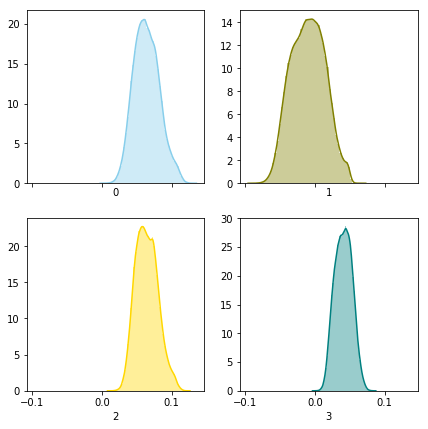

In [13]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[0], color='skyblue', ax=axes[0, 0])
sns.distplot(train[1], color='olive', ax=axes[0, 1])
sns.distplot(train[2], color='gold', ax=axes[1, 0])
sns.distplot(train[3], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


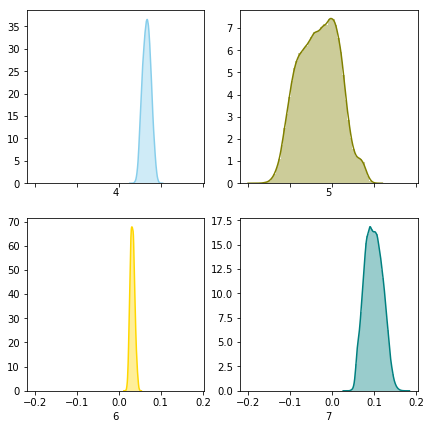

In [14]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[4], color='skyblue', ax=axes[0, 0])
sns.distplot(train[5], color='olive', ax=axes[0, 1])
sns.distplot(train[6], color='gold', ax=axes[1, 0])
sns.distplot(train[7], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


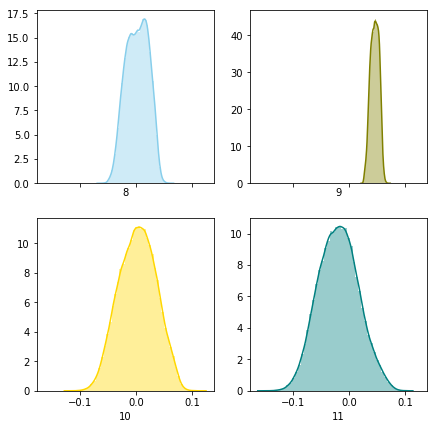

In [15]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[8], color='skyblue', ax=axes[0, 0])
sns.distplot(train[9], color='olive', ax=axes[0, 1])
sns.distplot(train[10], color='gold', ax=axes[1, 0])
sns.distplot(train[11], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


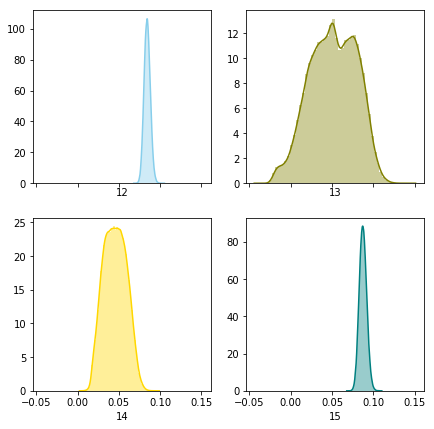

In [16]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[12], color='skyblue', ax=axes[0, 0])
sns.distplot(train[13], color='olive', ax=axes[0, 1])
sns.distplot(train[14], color='gold', ax=axes[1, 0])
sns.distplot(train[15], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


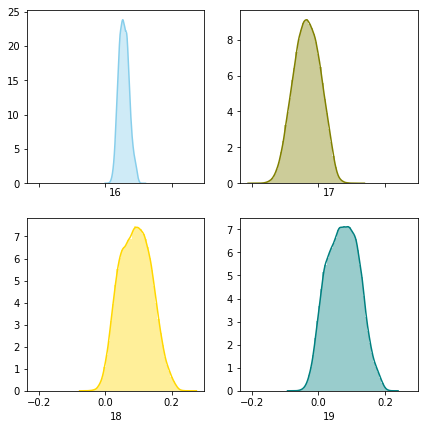

In [17]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[16], color='skyblue', ax=axes[0, 0])
sns.distplot(train[17], color='olive', ax=axes[0, 1])
sns.distplot(train[18], color='gold', ax=axes[1, 0])
sns.distplot(train[19], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


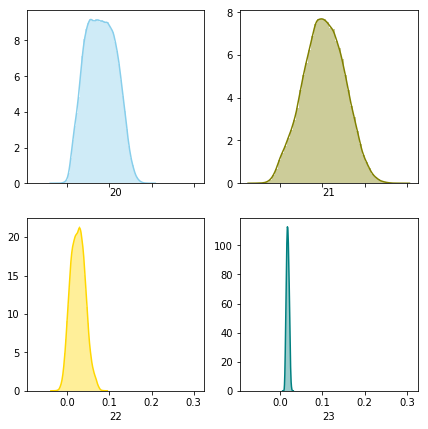

In [18]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[20], color='skyblue', ax=axes[0, 0])
sns.distplot(train[21], color='olive', ax=axes[0, 1])
sns.distplot(train[22], color='gold', ax=axes[1, 0])
sns.distplot(train[23], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


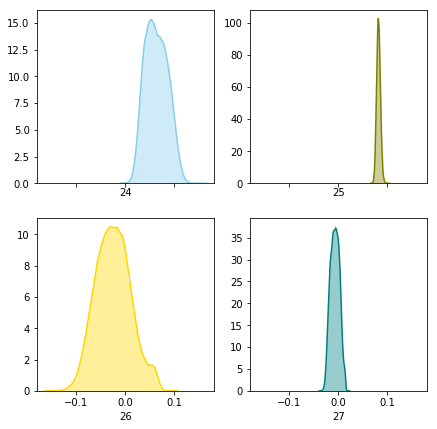

In [19]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[24], color='skyblue', ax=axes[0, 0])
sns.distplot(train[25], color='olive', ax=axes[0, 1])
sns.distplot(train[26], color='gold', ax=axes[1, 0])
sns.distplot(train[27], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


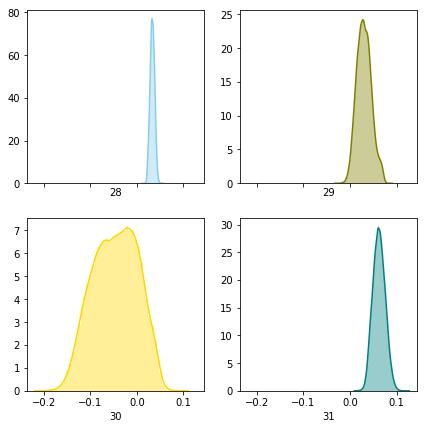

In [20]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[28], color='skyblue', ax=axes[0, 0])
sns.distplot(train[29], color='olive', ax=axes[0, 1])
sns.distplot(train[30], color='gold', ax=axes[1, 0])
sns.distplot(train[31], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


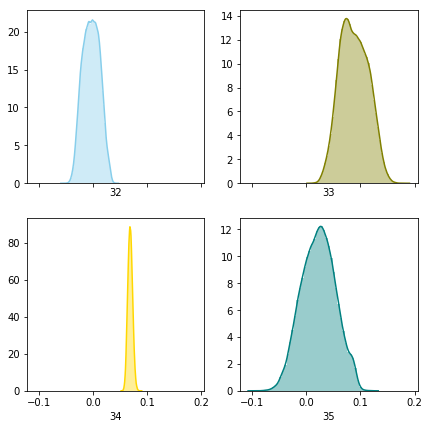

In [21]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[32], color='skyblue', ax=axes[0, 0])
sns.distplot(train[33], color='olive', ax=axes[0, 1])
sns.distplot(train[34], color='gold', ax=axes[1, 0])
sns.distplot(train[35], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


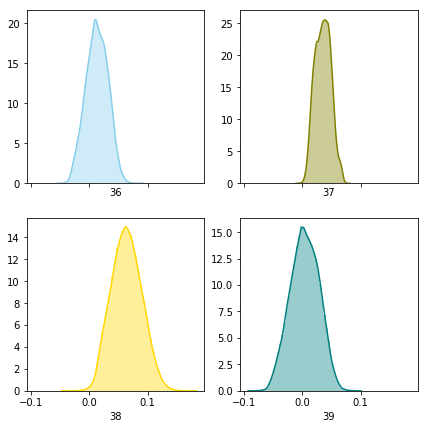

In [22]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[36], color='skyblue', ax=axes[0, 0])
sns.distplot(train[37], color='olive', ax=axes[0, 1])
sns.distplot(train[38], color='gold', ax=axes[1, 0])
sns.distplot(train[39], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


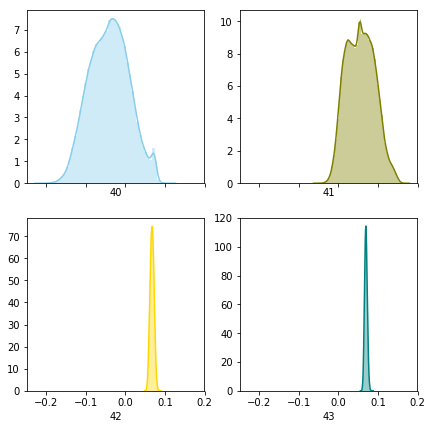

In [23]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[40], color='skyblue', ax=axes[0, 0])
sns.distplot(train[41], color='olive', ax=axes[0, 1])
sns.distplot(train[42], color='gold', ax=axes[1, 0])
sns.distplot(train[43], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


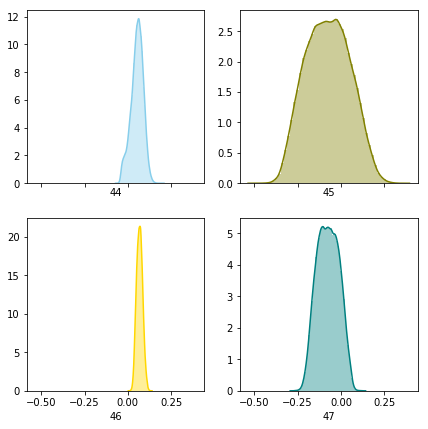

In [24]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[44], color='skyblue', ax=axes[0, 0])
sns.distplot(train[45], color='olive', ax=axes[0, 1])
sns.distplot(train[46], color='gold', ax=axes[1, 0])
sns.distplot(train[47], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


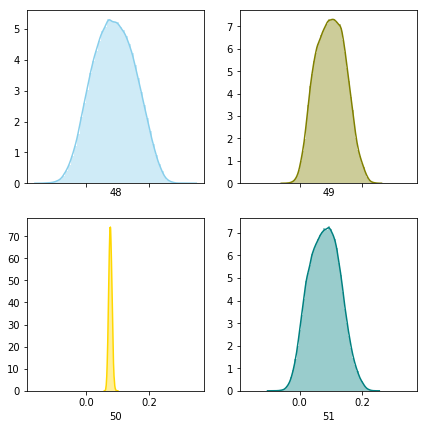

In [25]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[48], color='skyblue', ax=axes[0, 0])
sns.distplot(train[49], color='olive', ax=axes[0, 1])
sns.distplot(train[50], color='gold', ax=axes[1, 0])
sns.distplot(train[51], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


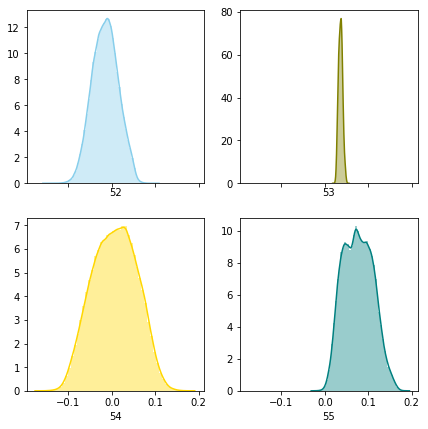

In [26]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[52], color='skyblue', ax=axes[0, 0])
sns.distplot(train[53], color='olive', ax=axes[0, 1])
sns.distplot(train[54], color='gold', ax=axes[1, 0])
sns.distplot(train[55], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


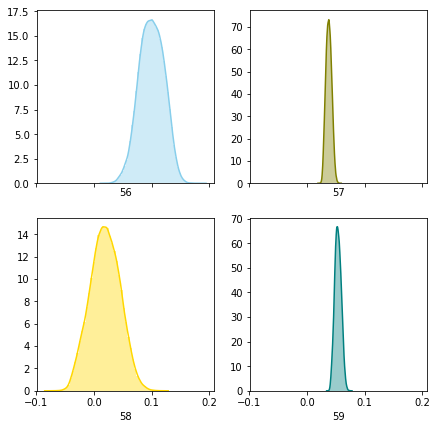

In [27]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[56], color='skyblue', ax=axes[0, 0])
sns.distplot(train[57], color='olive', ax=axes[0, 1])
sns.distplot(train[58], color='gold', ax=axes[1, 0])
sns.distplot(train[59], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


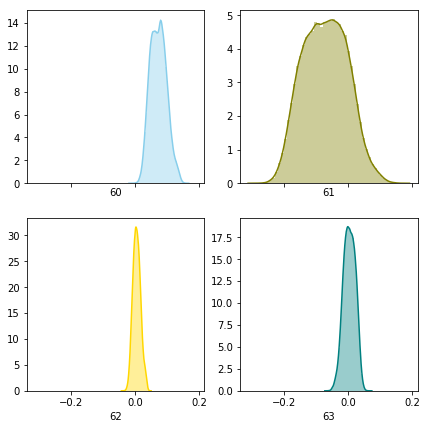

In [28]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[60], color='skyblue', ax=axes[0, 0])
sns.distplot(train[61], color='olive', ax=axes[0, 1])
sns.distplot(train[62], color='gold', ax=axes[1, 0])
sns.distplot(train[63], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


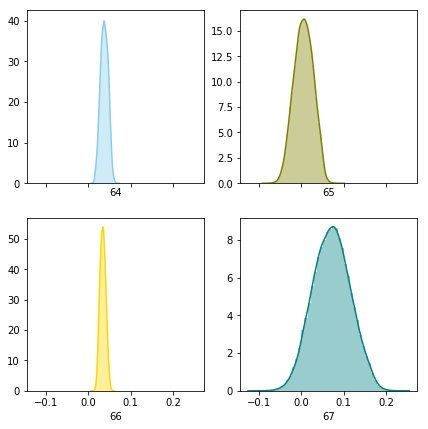

In [29]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[64], color='skyblue', ax=axes[0, 0])
sns.distplot(train[65], color='olive', ax=axes[0, 1])
sns.distplot(train[66], color='gold', ax=axes[1, 0])
sns.distplot(train[67], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


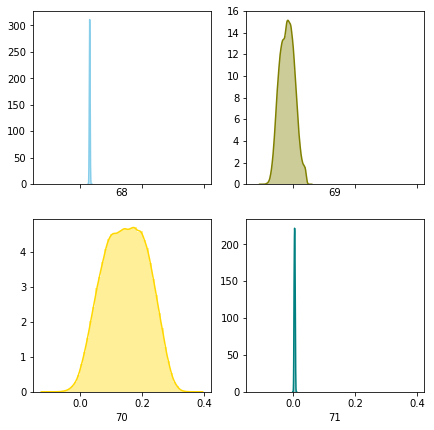

In [30]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[68], color='skyblue', ax=axes[0, 0])
sns.distplot(train[69], color='olive', ax=axes[0, 1])
sns.distplot(train[70], color='gold', ax=axes[1, 0])
sns.distplot(train[71], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


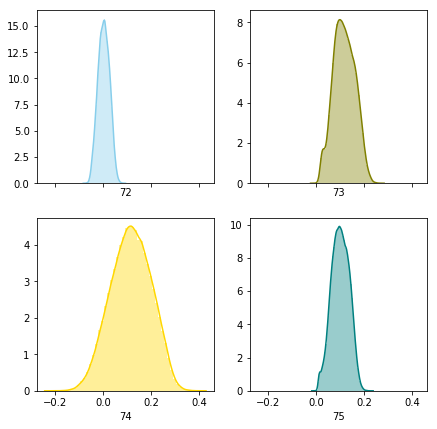

In [31]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[72], color='skyblue', ax=axes[0, 0])
sns.distplot(train[73], color='olive', ax=axes[0, 1])
sns.distplot(train[74], color='gold', ax=axes[1, 0])
sns.distplot(train[75], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


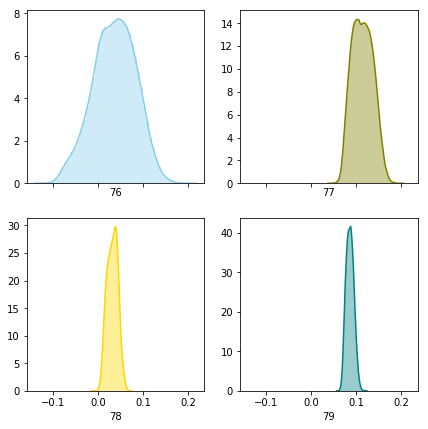

In [32]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[76], color='skyblue', ax=axes[0, 0])
sns.distplot(train[77], color='olive', ax=axes[0, 1])
sns.distplot(train[78], color='gold', ax=axes[1, 0])
sns.distplot(train[79], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


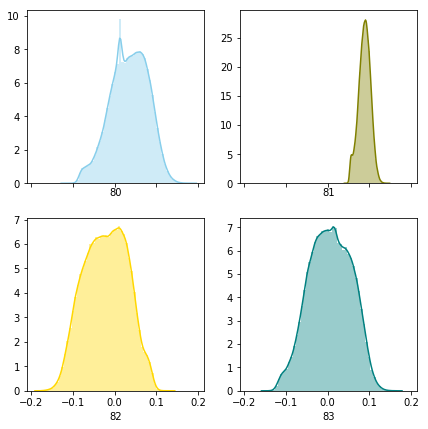

In [33]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[80], color='skyblue', ax=axes[0, 0])
sns.distplot(train[81], color='olive', ax=axes[0, 1])
sns.distplot(train[82], color='gold', ax=axes[1, 0])
sns.distplot(train[83], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


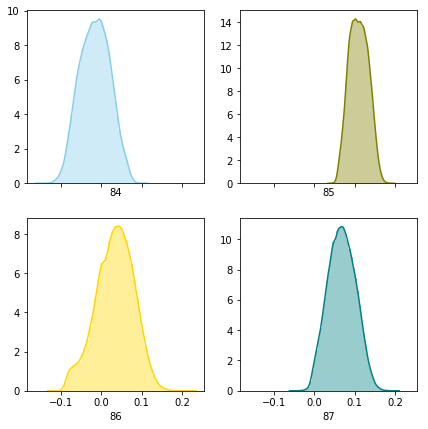

In [34]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[84], color='skyblue', ax=axes[0, 0])
sns.distplot(train[85], color='olive', ax=axes[0, 1])
sns.distplot(train[86], color='gold', ax=axes[1, 0])
sns.distplot(train[87], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


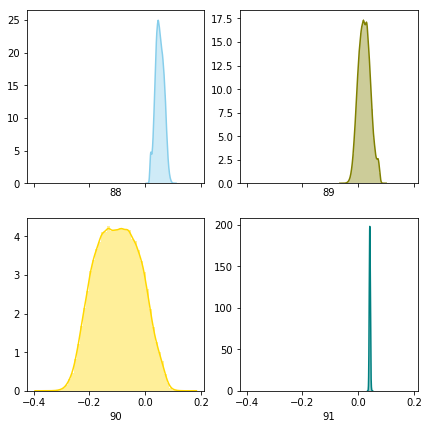

In [35]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[88], color='skyblue', ax=axes[0, 0])
sns.distplot(train[89], color='olive', ax=axes[0, 1])
sns.distplot(train[90], color='gold', ax=axes[1, 0])
sns.distplot(train[91], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


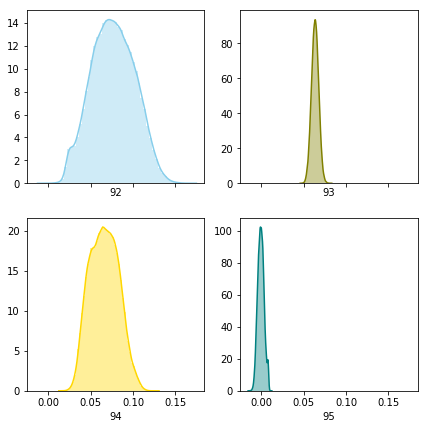

In [36]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[92], color='skyblue', ax=axes[0, 0])
sns.distplot(train[93], color='olive', ax=axes[0, 1])
sns.distplot(train[94], color='gold', ax=axes[1, 0])
sns.distplot(train[95], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


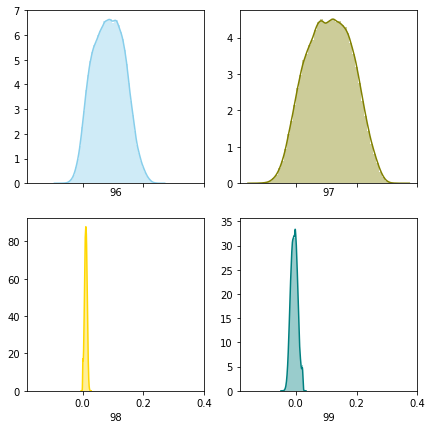

In [37]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[96], color='skyblue', ax=axes[0, 0])
sns.distplot(train[97], color='olive', ax=axes[0, 1])
sns.distplot(train[98], color='gold', ax=axes[1, 0])
sns.distplot(train[99], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


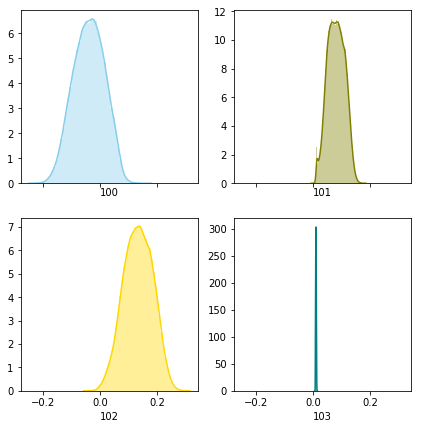

In [38]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[100], color='skyblue', ax=axes[0, 0])
sns.distplot(train[101], color='olive', ax=axes[0, 1])
sns.distplot(train[102], color='gold', ax=axes[1, 0])
sns.distplot(train[103], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


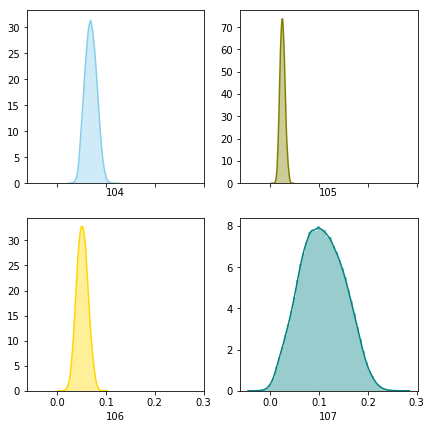

In [39]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[104], color='skyblue', ax=axes[0, 0])
sns.distplot(train[105], color='olive', ax=axes[0, 1])
sns.distplot(train[106], color='gold', ax=axes[1, 0])
sns.distplot(train[107], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


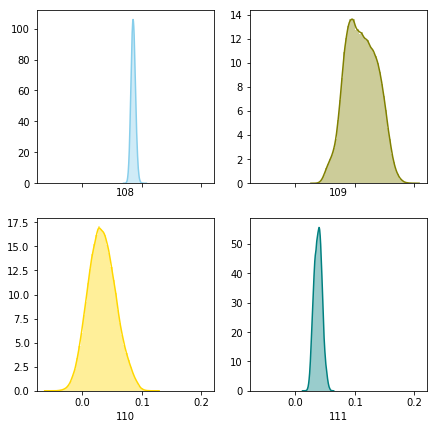

In [40]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[108], color='skyblue', ax=axes[0, 0])
sns.distplot(train[109], color='olive', ax=axes[0, 1])
sns.distplot(train[110], color='gold', ax=axes[1, 0])
sns.distplot(train[111], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


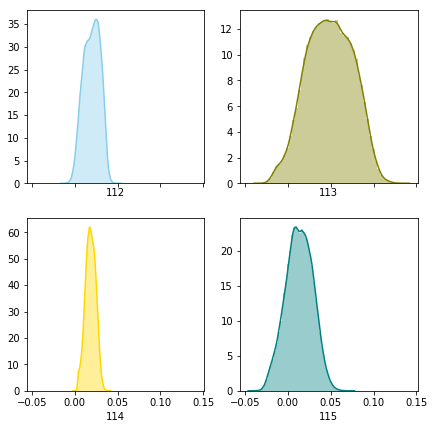

In [41]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[112], color='skyblue', ax=axes[0, 0])
sns.distplot(train[113], color='olive', ax=axes[0, 1])
sns.distplot(train[114], color='gold', ax=axes[1, 0])
sns.distplot(train[115], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


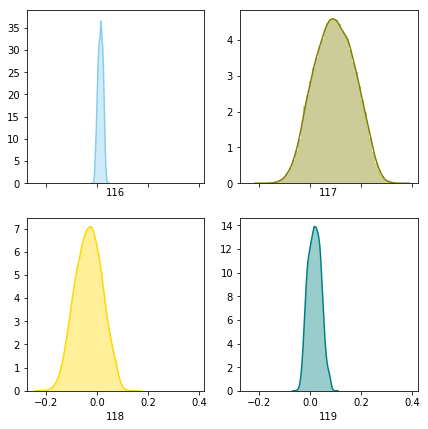

In [42]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[116], color='skyblue', ax=axes[0, 0])
sns.distplot(train[117], color='olive', ax=axes[0, 1])
sns.distplot(train[118], color='gold', ax=axes[1, 0])
sns.distplot(train[119], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


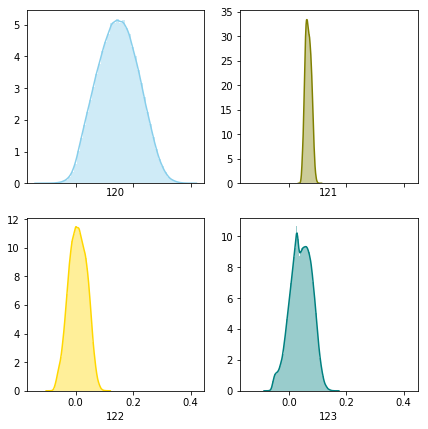

In [43]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[120], color='skyblue', ax=axes[0, 0])
sns.distplot(train[121], color='olive', ax=axes[0, 1])
sns.distplot(train[122], color='gold', ax=axes[1, 0])
sns.distplot(train[123], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


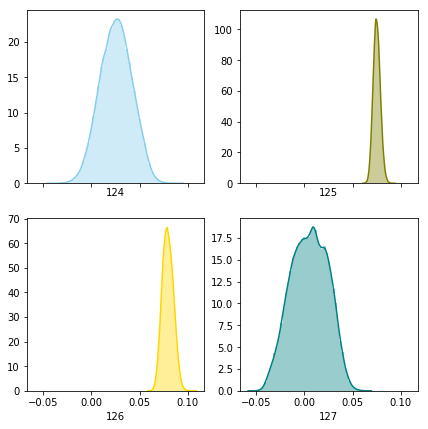

In [44]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[124], color='skyblue', ax=axes[0, 0])
sns.distplot(train[125], color='olive', ax=axes[0, 1])
sns.distplot(train[126], color='gold', ax=axes[1, 0])
sns.distplot(train[127], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


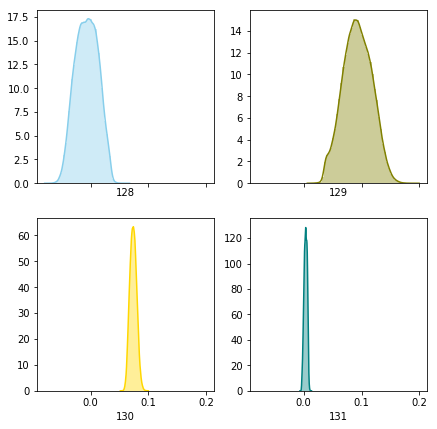

In [45]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[128], color='skyblue', ax=axes[0, 0])
sns.distplot(train[129], color='olive', ax=axes[0, 1])
sns.distplot(train[130], color='gold', ax=axes[1, 0])
sns.distplot(train[131], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


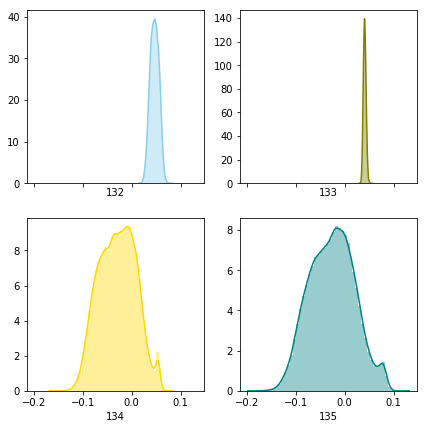

In [46]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[132], color='skyblue', ax=axes[0, 0])
sns.distplot(train[133], color='olive', ax=axes[0, 1])
sns.distplot(train[134], color='gold', ax=axes[1, 0])
sns.distplot(train[135], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


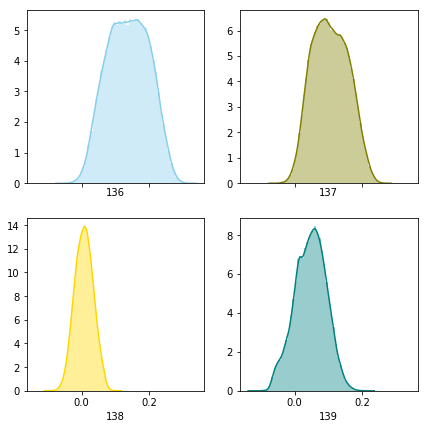

In [47]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[136], color='skyblue', ax=axes[0, 0])
sns.distplot(train[137], color='olive', ax=axes[0, 1])
sns.distplot(train[138], color='gold', ax=axes[1, 0])
sns.distplot(train[139], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


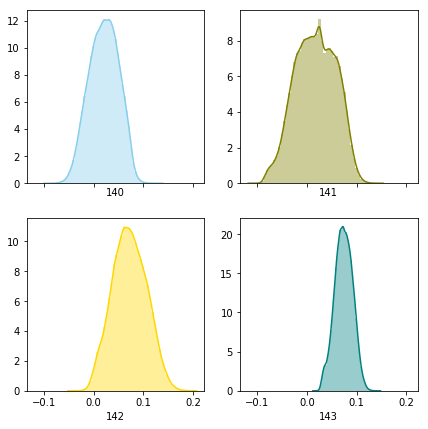

In [48]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[140], color='skyblue', ax=axes[0, 0])
sns.distplot(train[141], color='olive', ax=axes[0, 1])
sns.distplot(train[142], color='gold', ax=axes[1, 0])
sns.distplot(train[143], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


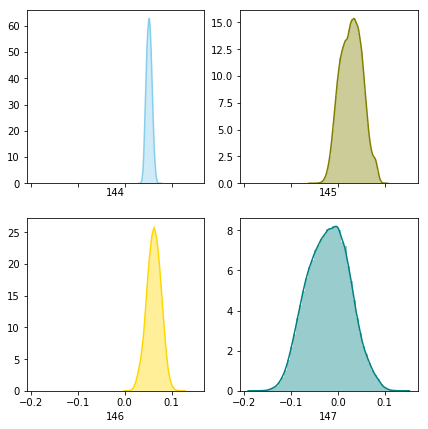

In [49]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[144], color='skyblue', ax=axes[0, 0])
sns.distplot(train[145], color='olive', ax=axes[0, 1])
sns.distplot(train[146], color='gold', ax=axes[1, 0])
sns.distplot(train[147], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


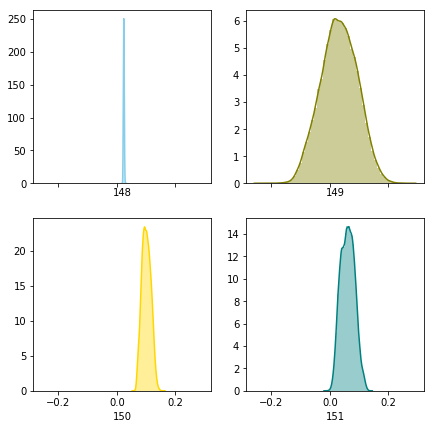

In [50]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[148], color='skyblue', ax=axes[0, 0])
sns.distplot(train[149], color='olive', ax=axes[0, 1])
sns.distplot(train[150], color='gold', ax=axes[1, 0])
sns.distplot(train[151], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


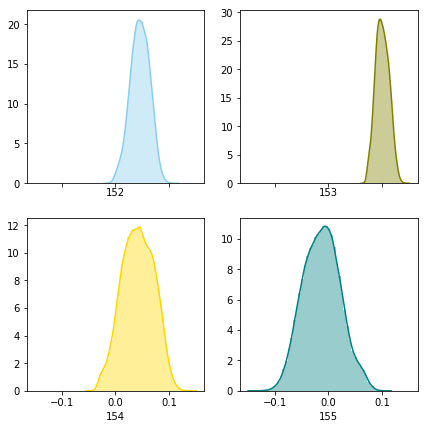

In [51]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[152], color='skyblue', ax=axes[0, 0])
sns.distplot(train[153], color='olive', ax=axes[0, 1])
sns.distplot(train[154], color='gold', ax=axes[1, 0])
sns.distplot(train[155], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


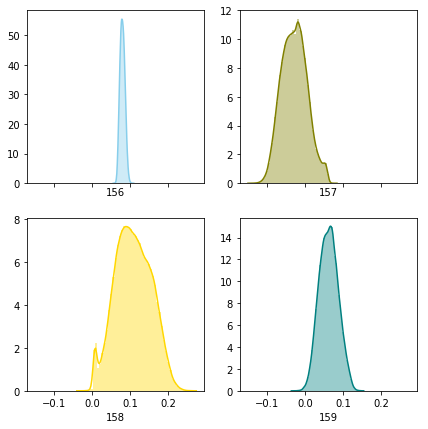

In [52]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[156], color='skyblue', ax=axes[0, 0])
sns.distplot(train[157], color='olive', ax=axes[0, 1])
sns.distplot(train[158], color='gold', ax=axes[1, 0])
sns.distplot(train[159], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


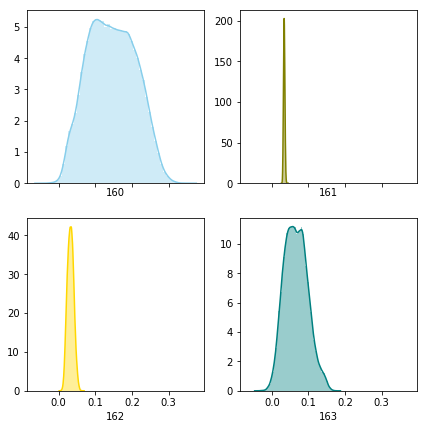

In [53]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[160], color='skyblue', ax=axes[0, 0])
sns.distplot(train[161], color='olive', ax=axes[0, 1])
sns.distplot(train[162], color='gold', ax=axes[1, 0])
sns.distplot(train[163], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


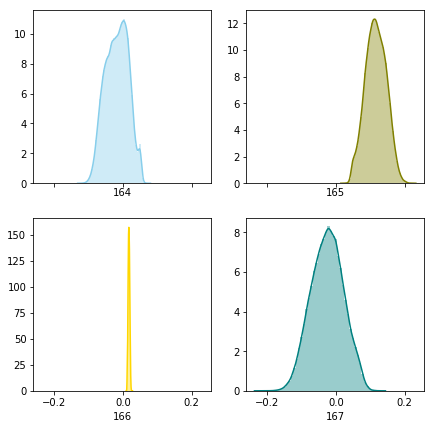

In [54]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[164], color='skyblue', ax=axes[0, 0])
sns.distplot(train[165], color='olive', ax=axes[0, 1])
sns.distplot(train[166], color='gold', ax=axes[1, 0])
sns.distplot(train[167], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


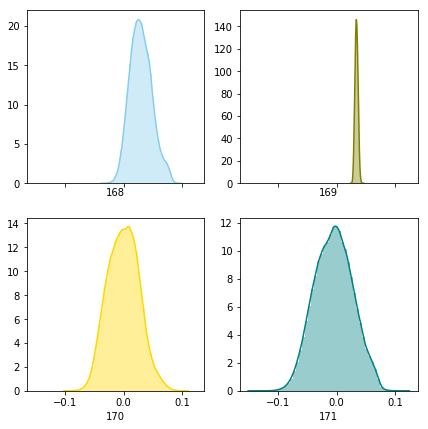

In [55]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[168], color='skyblue', ax=axes[0, 0])
sns.distplot(train[169], color='olive', ax=axes[0, 1])
sns.distplot(train[170], color='gold', ax=axes[1, 0])
sns.distplot(train[171], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


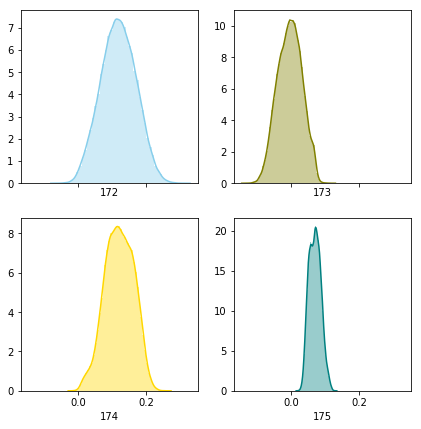

In [56]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[172], color='skyblue', ax=axes[0, 0])
sns.distplot(train[173], color='olive', ax=axes[0, 1])
sns.distplot(train[174], color='gold', ax=axes[1, 0])
sns.distplot(train[175], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


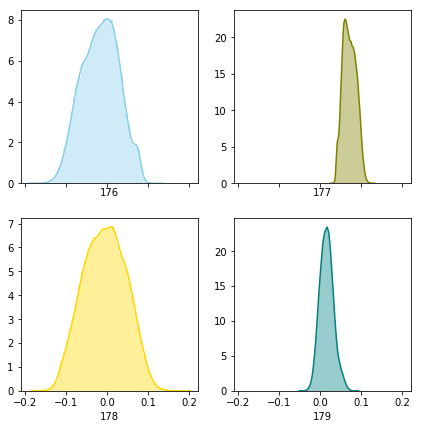

In [57]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[176], color='skyblue', ax=axes[0, 0])
sns.distplot(train[177], color='olive', ax=axes[0, 1])
sns.distplot(train[178], color='gold', ax=axes[1, 0])
sns.distplot(train[179], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


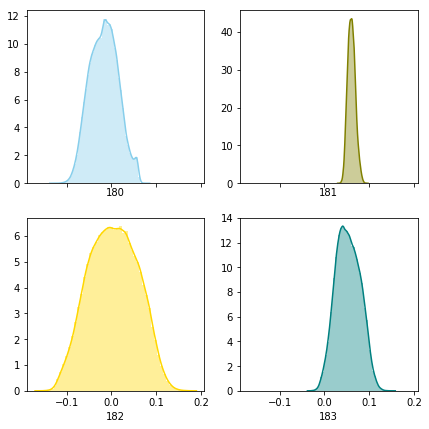

In [58]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[180], color='skyblue', ax=axes[0, 0])
sns.distplot(train[181], color='olive', ax=axes[0, 1])
sns.distplot(train[182], color='gold', ax=axes[1, 0])
sns.distplot(train[183], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


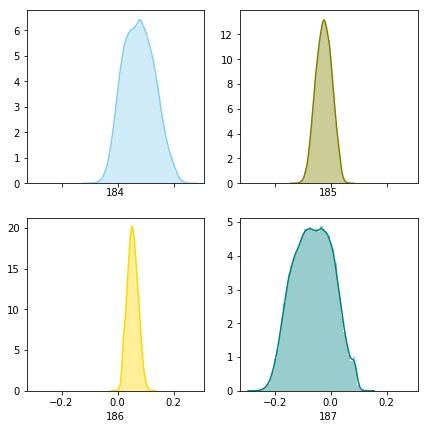

In [59]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[184], color='skyblue', ax=axes[0, 0])
sns.distplot(train[185], color='olive', ax=axes[0, 1])
sns.distplot(train[186], color='gold', ax=axes[1, 0])
sns.distplot(train[187], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


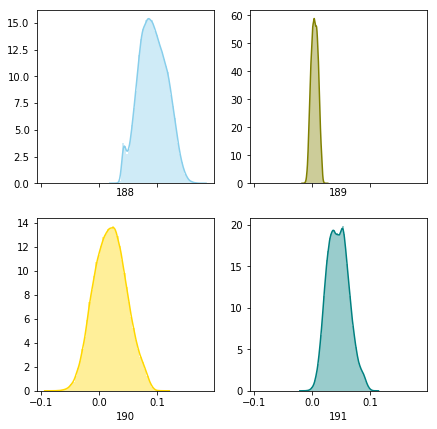

In [60]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[188], color='skyblue', ax=axes[0, 0])
sns.distplot(train[189], color='olive', ax=axes[0, 1])
sns.distplot(train[190], color='gold', ax=axes[1, 0])
sns.distplot(train[191], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


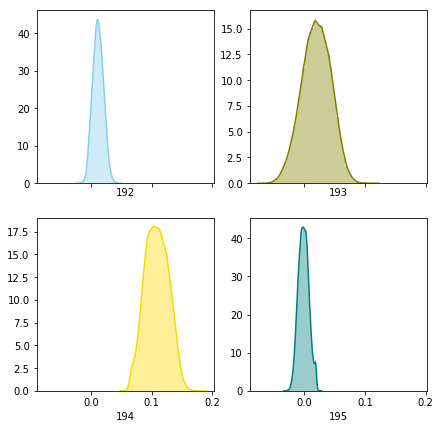

In [61]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[192], color='skyblue', ax=axes[0, 0])
sns.distplot(train[193], color='olive', ax=axes[0, 1])
sns.distplot(train[194], color='gold', ax=axes[1, 0])
sns.distplot(train[195], color='teal', ax=axes[1, 1])

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


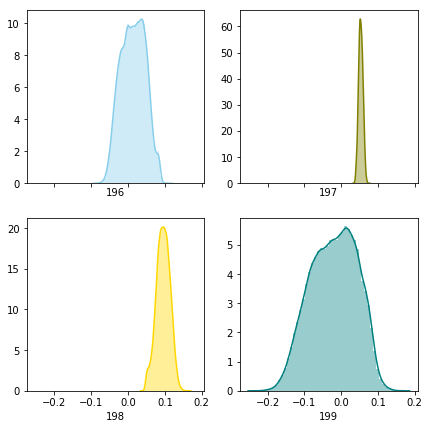

In [62]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(train[196], color='skyblue', ax=axes[0, 0])
sns.distplot(train[197], color='olive', ax=axes[0, 1])
sns.distplot(train[198], color='gold', ax=axes[1, 0])
sns.distplot(train[199], color='teal', ax=axes[1, 1])

In [63]:
#sns.pairplot(train)
#sns.plt.show();

In [64]:
#pd.plotting.scatter_matrix(train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Data cleanup and feature engineering
### Data fields

Things to try:

*Training data*

Nothing emerged from the histogram perspective. Correlations will not be considered here as these are incorporated in the models. Interaction or moderation effects could be tested with high effort, but are out of scope - especially as the dataset is anonymized. 

## Final dataset and normalization

### Training dataset

The feature engineering conducted for the training dataset will be done for test data, respectively.

In [13]:
full_train = train

### Test dataset

##### Compiling test datafields, sentiment, CNN adoption prediction and dataset merger

In [14]:
full_test = test

## Score function

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


**Score function used for algorithm development**

For internal training, the scikit classification evaluation methods accuracy score, precision, recall and f1 score will be used in addition to the overall scoring function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

In [15]:
# Importing libraries and creating scores table
# https://scikit-learn.org/stable/modules/model_evaluation.html
# scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

from sklearn.metrics import roc_auc_score

scores = pd.DataFrame(columns=['Classifier', 'ROC'])

## Train validation split

We can create a train test split on the training data before we can expose our model to the test dataset at first place. The train dataset includes 200,000 rows, the given test dataset 200,000 rows.

The train set will be split into 160,000 training rows and 40,000 validation rows. The models will be trained on this data before predicting data along the test set. For simplicity, the artificial test set will be referred to as "validation set". Implementation will be along one comprehensive dataframe. 

In [51]:
# Splitting the dataset into train and validation

from sklearn.model_selection import train_test_split
from sklearn import cross_validation

# Considering the distributions of target variable

target = train['target']

train_data, valid_data = cross_validation.train_test_split(full_train, train_size=0.8, stratify=target, random_state=25)

print('Observations: %d' % (len(full_train)))
print('Training Observations: %d' % (len(train_data)))
print('Validation Observations: %d' % (len(valid_data)))

Observations: 200000
Training Observations: 160000
Validation Observations: 40000


## Develop the classifier model

Following classifier models will be tried for this project: 
- https://scikit-learn.org/stable/modules/sgd.html#classification
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

### Selecting model input data

In [52]:
from sklearn.preprocessing import Imputer

imputer = Imputer()

train_variables = train_data.drop(['ID_code', 'target'], axis=1)

train_variables = imputer.fit_transform(train_variables)

train_targets = train_data['target']

valid_variables = valid_data.drop(['ID_code', 'target'], axis=1)

valid_variables = imputer.fit_transform(valid_variables)

valid_targets = valid_data['target']

### Stochastic Gradient Descent (SGD) classifier

In [18]:
# https://scikit-learn.org/stable/modules/sgd.html#classification

from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier(alpha=0.0001, epsilon=0.1, eta0=0.0, fit_intercept=True, 
                          learning_rate='optimal', loss="log", penalty="l2", max_iter=5, random_state=25)

SGD_model.fit(train_variables, train_targets)

SGD_preds = SGD_model.predict_proba(valid_variables)[:,1]

classifier = 'SGD'

ROC = roc_auc_score(valid_targets, SGD_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.81


### k neighbors classifier

In [71]:
"""# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

kneigh_model = KNeighborsClassifier(n_neighbors=15)

kneigh_model.fit(train_variables, train_targets)

kneigh_preds = kneigh_model.predict_proba(valid_variables)[:,1]

classifier = 'kNeigh'

ROC = roc_auc_score(valid_targets, kneigh_preds, average='weighted')

scores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)"""

"# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier\n\nfrom sklearn.neighbors import KNeighborsClassifier\n\nkneigh_model = KNeighborsClassifier(n_neighbors=15)\n\nkneigh_model.fit(train_variables, train_targets)\n\nkneigh_preds = kneigh_model.predict_proba(valid_variables)[:,1]\n\nclassifier = 'kNeigh'\n\nROC = roc_auc_score(valid_targets, kneigh_preds, average='weighted')\n\nscores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)\n\n# ROC\nprint('ROC curve area: %.2f' % ROC)"

### Multi-layer perceptron (MLP) classifier

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(100, ), 
                          activation='relu', 
                          solver='adam', 
                          alpha=0.0001, 
                          batch_size='auto', 
                          learning_rate='constant', 
                          learning_rate_init=0.001,
                          random_state=25)

MLP_model.fit(train_variables, train_targets)

MLP_preds = MLP_model.predict_proba(valid_variables)[:,1]

classifier = 'MLP'

ROC = roc_auc_score(valid_targets, MLP_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.85


### Support vector classifier (SVC)

In [73]:
"""# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.svm import SVC

SVC_model = SVC(probability=True, random_state=25)

SVC_model.fit(train_variables, train_targets)

SVC_preds = SVC_model.predict_proba(valid_variables)[:,1]

classifier = 'SVC'

ROC = roc_auc_score(valid_targets, SVC_preds, average='weighted')

scores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)"""

"# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html\n\nfrom sklearn.svm import SVC\n\nSVC_model = SVC(probability=True, random_state=25)\n\nSVC_model.fit(train_variables, train_targets)\n\nSVC_preds = SVC_model.predict_proba(valid_variables)[:,1]\n\nclassifier = 'SVC'\n\nROC = roc_auc_score(valid_targets, SVC_preds, average='weighted')\n\nscores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)\n\n# ROC\nprint('ROC curve area: %.2f' % ROC)"

### Linear support vector classifier (Linear SVC)

In [74]:
"""# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

from sklearn.svm import LinearSVC

LinSVC_model = LinearSVC(probability=True, random_state=25)

LinSVC_model.fit(train_variables, train_targets)

LinSVC_preds = LinSVC_model.predict_proba(valid_variables)[:,1]

classifier = 'Linear SVC'

ROC = roc_auc_score(valid_targets, LinSVC_preds, average='weighted')

scores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)"""

"# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC\n\nfrom sklearn.svm import LinearSVC\n\nLinSVC_model = LinearSVC(probability=True, random_state=25)\n\nLinSVC_model.fit(train_variables, train_targets)\n\nLinSVC_preds = LinSVC_model.predict_proba(valid_variables)[:,1]\n\nclassifier = 'Linear SVC'\n\nROC = roc_auc_score(valid_targets, LinSVC_preds, average='weighted')\n\nscores = scores.append(pd.Series([ROC], index=scores.columns), ignore_index=True)\n\n# ROC\nprint('ROC curve area: %.2f' % ROC)"

### Decision Tree Classifier

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

DecTree_model = DecisionTreeClassifier(random_state=25)

DecTree_model.fit(train_variables, train_targets)

DecTree_preds = DecTree_model.predict_proba(valid_variables)[:,1]

classifier = 'Decision Tree'

ROC = roc_auc_score(valid_targets, DecTree_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.55


### Gradient boosting ensemble classifier

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

GradBoost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=25)

GradBoost_model.fit(train_variables, train_targets)

GradBoost_preds = GradBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'Gradient Boost'

ROC = roc_auc_score(valid_targets, GradBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ROC curve area: 0.82


### Random forest ensemble classifier

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RndmForest_model = RandomForestClassifier(random_state=25)

RndmForest_model.fit(train_variables, train_targets)

RndmForest_preds = RndmForest_model.predict_proba(valid_variables)[:,1]

classifier = 'Random Forest'

ROC = roc_auc_score(valid_targets, RndmForest_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.68


### Bagging ensemble classifier

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)

Bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=25)

Bagging_model.fit(train_variables, train_targets)

Bagging_preds = Bagging_model.predict_proba(valid_variables)[:,1]

classifier = 'Bagging'

ROC = roc_auc_score(valid_targets, Bagging_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


ROC curve area: 0.87


### AdaBoost ensemble classifier

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME', 
                                    learning_rate=0.001,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

ROC curve area: 0.86


### XGBoost classifier

In [25]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

XGBoost_model = XGBClassifier(learning_rate=0.001, stratify=True, random_state=25)

XGBoost_model.fit(train_variables, train_targets)

XGBoost_preds = XGBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'XGBoost'

ROC = roc_auc_score(valid_targets, XGBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.63


### LightGBM

In [26]:
# https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/sklearn.html
# https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

import lightgbm as lgb
from lightgbm import LGBMClassifier

train_data = lgb.Dataset(train_variables, label=train_targets)

lgb_model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)

lgb_model.fit(train_variables, train_targets)

lgb_preds = lgb_model.predict_proba(valid_variables)[:,1]

classifier = 'LightGBM'

ROC = roc_auc_score(valid_targets, lgb_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.85


### Performance comparison

In [27]:
# Looking at performance scores

print(scores)

       Classifier       ROC
0             SGD  0.806893
1             MLP  0.853280
2   Decision Tree  0.548791
3  Gradient Boost  0.820378
4   Random Forest  0.681885
5         Bagging  0.866517
6        AdaBoost  0.864083
7         XGBoost  0.627318
8        LightGBM  0.853474


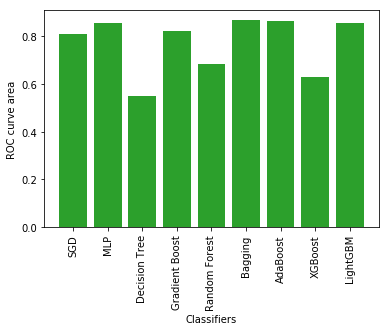

In [28]:
# Plotting ROC curve area comparison

plt.bar(scores['Classifier'], scores['ROC'], color='C2')
plt.xticks(rotation=90)
plt.ylabel('ROC curve area')
plt.xlabel('Classifiers');

### Top performer fine-tuning

In [85]:
# Use grid search https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
# Params useful for grid search in LGB: num_leaves, max_depth, n_estimators and learning rate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

train_data = lgb.Dataset(train_variables, label=train_targets)

lgb_simple = LGBMClassifier(boosting_type='gbdt')

roc_scorer = make_scorer(roc_auc_score)

num_leaves = [10, 20, 30, 40, 50]

max_depth = [1, 2, 5, 7, 10]

n_estimators = [25, 50, 100, 200]

learning_rate = [0.001, 0.01, 0.1]

param_grid = dict(num_leaves= num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)

grid_search = GridSearchCV(lgb_simple, param_grid, scoring=roc_scorer, n_jobs=-1, cv=5, return_train_score=True)
grid_result = grid_search.fit(train_variables, train_targets)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

"""# Plot results
results = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, results[i], label='learning_rate: ' + str(value))
plt.legend()
plt.title("LGB boosting learning rate / n_estimators / ROC curve area")
plt.xlabel('n_estimators')
plt.ylabel("ROC curve area")
plt.savefig('Santander_ALGORITHM_gridsearch.png')"""

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Best: 0.598707 using {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 50}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 25, 'num_leaves': 10}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 25, 'num_leaves': 20}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 25, 'num_leaves': 30}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 25, 'num_leaves': 40}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 25, 'num_leaves': 50}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'num_leaves': 10}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'num_leaves': 20}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'num_leaves': 30}
0.500000 (0.000000) with: {'learning_rate': 0.001, 'max_dept

'# Plot results\nresults = np.array(means).reshape(len(learning_rate), len(n_estimators))\nfor i, value in enumerate(learning_rate):\n    plt.plot(n_estimators, results[i], label=\'learning_rate: \' + str(value))\nplt.legend()\nplt.title("LGB boosting learning rate / n_estimators / ROC curve area")\nplt.xlabel(\'n_estimators\')\nplt.ylabel("ROC curve area")\nplt.savefig(\'Santander_ALGORITHM_gridsearch.png\')'

In [30]:
# Use grid search https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
# Params useful for grid search in MLP: learning_rate_init and alpha and hidden layer size

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

MLP_simple = MLPClassifier()

roc_scorer = make_scorer(roc_auc_score)

hidden_layer_sizes=[(100, )]

alpha = [0.001, 0.01, 0.1]

learning_rate_init = [0.001, 0.01, 0.1]

param_grid = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, alpha=alpha)

grid_search = GridSearchCV(MLP_simple, param_grid, scoring=roc_scorer, n_jobs=-1, cv=5, return_train_score=True)
grid_result = grid_search.fit(train_variables, train_targets)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.616944 using {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
0.605578 (0.017121) with: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
0.593890 (0.026708) with: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
0.616944 (0.038494) with: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
0.616333 (0.031240) with: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
0.608731 (0.030607) with: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
0.550231 (0.028439) with: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
0.550857 (0.018743) with: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
0.551470 (0.025103) with: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
0.519182 (0.033931) with: {'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}


## And the winners are..

In [31]:
# LGB (tuned)
# https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/sklearn.html
# https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

import lightgbm as lgb
from lightgbm import LGBMClassifier

train_data = lgb.Dataset(train_variables, label=train_targets)

lgb_model = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=300)

lgb_model.fit(train_variables, train_targets)

lgb_preds = lgb_model.predict_proba(valid_variables)[:,1]

classifier = 'LightGBM'

ROC = roc_auc_score(valid_targets, lgb_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.88


In [32]:
# Bagging (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=300)

Bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=25)

Bagging_model.fit(train_variables, train_targets)

Bagging_preds = Bagging_model.predict_proba(valid_variables)[:,1]

classifier = 'Bagging (tuned)'

ROC = roc_auc_score(valid_targets, Bagging_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.89


In [34]:
# AdaBoost (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=300)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME', 
                                    learning_rate=0.001,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost (tuned lr 0.001)'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

ROC curve area: 0.89


In [35]:
# AdaBoost (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=300)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME', 
                                    learning_rate=0.01,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost (tuned lr 0.01)'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/manuelfreude/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sk

ROC curve area: 0.89


In [36]:
# MLP (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(100, ), 
                          activation='relu', 
                          solver='adam', 
                          alpha=0.001, 
                          batch_size='auto', 
                          learning_rate='constant', 
                          learning_rate_init=0.1,
                          random_state=25)

MLP_model.fit(train_variables, train_targets)

MLP_preds = MLP_model.predict_proba(valid_variables)[:,1]

classifier = 'MLP (tuned hl 100)'

ROC = roc_auc_score(valid_targets, MLP_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.84


In [37]:
# MLP (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(200, ), 
                          activation='relu', 
                          solver='adam', 
                          alpha=0.001, 
                          batch_size='auto', 
                          learning_rate='constant', 
                          learning_rate_init=0.1,
                          random_state=25)

MLP_model.fit(train_variables, train_targets)

MLP_preds = MLP_model.predict_proba(valid_variables)[:,1]

classifier = 'MLP (tuned hl 200)'

ROC = roc_auc_score(valid_targets, MLP_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.85


In [38]:
print(scores)

                   Classifier       ROC
0                         SGD  0.806893
1                         MLP  0.853280
2               Decision Tree  0.548791
3              Gradient Boost  0.820378
4               Random Forest  0.681885
5                     Bagging  0.866517
6                    AdaBoost  0.864083
7                     XGBoost  0.627318
8                    LightGBM  0.853474
9                    LightGBM  0.875148
10            Bagging (tuned)  0.885869
11  AdaBoost (tuned lr 0.001)  0.887381
12   AdaBoost (tuned lr 0.01)  0.888176
13         MLP (tuned hl 100)  0.842663
14         MLP (tuned hl 200)  0.845177


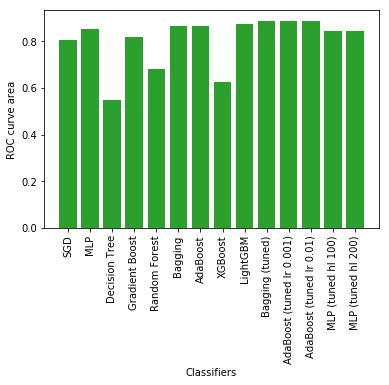

In [39]:
# Plotting ROC curve area comparison

plt.bar(scores['Classifier'], scores['ROC'], color='C2')
plt.xticks(rotation=90)
plt.ylabel('ROC curve area')
plt.xlabel('Classifiers');

In [42]:
# AdaBoost (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=300)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME.R', 
                                    learning_rate=0.001,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost (tuned lr 0.001 SR)'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.89


In [54]:
# AdaBoost (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=400)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME.R', 
                                    n_estimators=150,
                                    learning_rate=0.01,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost (tuned lr 0.01 SR)'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

ROC curve area: 0.89


In [ ]:
# Ada best 150 estimators

print(scores)

In [ ]:
# Plotting ROC curve area comparison

plt.bar(scores['Classifier'], scores['ROC'], color='C2')
plt.xticks(rotation=90)
plt.ylabel('ROC curve area')
plt.xlabel('Classifiers');

## Predicting and writing predictions to submission file

In [57]:
from sklearn.preprocessing import Imputer

imputer = Imputer()

test_variables = full_test.drop(['ID_code'], axis=1)

test_variables = imputer.fit_transform(test_variables)

In [ ]:
# AdaBoost (tuned)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

base_estimator = LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=-10, learning_rate=0.1, n_estimators=400)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME.R', 
                                    n_estimators=200,
                                    learning_rate=0.01,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict_proba(valid_variables)[:,1]

classifier = 'AdaBoost (tuned lr 0.01 SR)'

ROC = roc_auc_score(valid_targets, AdaBoost_preds, average='weighted')

scores = scores.append(pd.Series([classifier, ROC], index=scores.columns), ignore_index=True)

# ROC
print('ROC curve area: %.2f' % ROC)

In [ ]:
# Make predictions
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

AdaBoost_preds = AdaBoost_model.predict_proba(test_variables)[:,1]

print('You have completed the classification!')

In [ ]:
# https://www.kaggle.com/gaborvecsei/adoption-speed-from-images

submission = pd.DataFrame()

submission['ID_code'] = full_test['ID_code']

submission['target'] = AdaBoost_preds

submission.head()

In [ ]:
submission.info()

In [ ]:
submission['target'].value_counts()

In [ ]:
submission.to_csv('submission.csv', index=False)